## Knn model building and Cross validation on Diabetes data

In [248]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [249]:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [250]:
from sklearn.preprocessing import StandardScaler

In [251]:
data=pd.read_csv('diabetes.csv') #loading the file

In [252]:
data.ndim #it is a 2d data

2

In [253]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [254]:
data.shape# 768 rows and 9 columns

(768, 9)

In [255]:
#Checking the missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [256]:
#checking for unique values for each data column
for i in data.columns:
    print(i)
    print(data[i].unique())


Pregnancies
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 9

In [257]:
#since there are some many records where zero is filled in columns-glucose, bp, skinthickness, bmi,insulin,
#we will replace them using each columns' average that is mean

In [258]:
columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in columns:
    data[i]=data[i].replace(0,np.mean(data[i]))    

In [259]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [261]:
data.info()
#all the columns are either float or integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


It is a classification problem where we need to classify if the person is diabetic or not.
We will be using the knn model classifier for predicting the same.


In [262]:
#Dividing the data into X and Y

In [263]:
x=data.iloc[:,:8]
y=data['Outcome']

In [264]:
#Dividing the data(x,y) into train and test

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

### Featue Scaling:
Since we are using a distance based algo, we have to scale the data for accurate predictions.

In [267]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train) #training and testing x_train
x_test=sc.transform(x_test) #x_test is just tranformed

## KNN Classifier
K-NN is a lazy learner because it doesn’t learn a discriminative function from the training data but “memorizes” the training dataset instead.

Deciding no.of neighbors ie k: We can always tune the for the value of k but here the simple way is mentioned by me.
As we know k is equal to sqrt of n where n is the length of the x_train dataset ,so we will find k using that ideaology.

np.sqrt(len(x_test))

so we will take k=15 (approx)

In [268]:
model=KNeighborsClassifier(n_neighbors=15,p=2,metric='euclidean') 
#we are taking k=15 because of the above explaination
#p=2 means there are 2 classes in the target variable(0,1) 

model.fit(x_train,y_train) #making the model learn from train data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [269]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

### The model has been built. 


## Evaluating the knn model:

Now we will evaluate the model using 4 different accuracies:
a) Confusion Matrix
b) Accuracy score
c) F1_score
d) Roc_auc_score

In [270]:
accuracy_1=confusion_matrix(y_test,y_pred)

accuracy_2=f1_score(y_test,y_pred)

accuracy_3=accuracy_score(y_test,y_pred)

accuracy_4=roc_auc_score(y_test,y_pred)

In [271]:
print('accuracy_1:',accuracy_1) #Confusion matrix

accuracy_1: [[139  18]
 [ 33  41]]


In [272]:
print('accuracy_2:',accuracy_2) #F1_score

accuracy_2: 0.6165413533834587


In [273]:
print('accuracy_3:',accuracy_3) #Accuracy_score

accuracy_3: 0.7792207792207793


In [274]:
print('accuracy_4:',accuracy_4) #roc_auc_score

accuracy_4: 0.7197021862626958


Out of all the above mentioned accuracies, roc_auc is considered the best metrics to check for checking the model when data is having target as binary.
so here we will cross validate this accuracy (roc_auc).

In [275]:
#cross validation
#cross validation is used as our abvove accuracy will change at different random state value.

score=cross_val_score(model,x,y,cv=5,scoring='roc_auc')
print(score) # this will give accuracies of 5 different experiments
print(score.mean()) #this will give the mean of the accuracies of the 5 different experiment.

[0.77175926 0.72731481 0.80314815 0.87169811 0.80254717]
0.795293501048218


In [277]:
#Let's test which K is the best. Test K from 1 to 30 and set 5-fold here.
k_range = range(1,31)
k_scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i,p=2,metric='euclidean')
    scores = cross_val_score(knn,x,y,cv=10,scoring='roc_auc')
    k_scores.append(scores.mean())
k_scores

[0.6552934472934472,
 0.7087720797720797,
 0.730037037037037,
 0.7495883190883191,
 0.7603803418803418,
 0.7762364672364672,
 0.7774558404558405,
 0.7823532763532763,
 0.7933447293447293,
 0.7952421652421651,
 0.7961837606837607,
 0.7971866096866097,
 0.7958960113960114,
 0.7952606837606837,
 0.7955968660968662,
 0.799940170940171,
 0.7993262108262109,
 0.7987279202279203,
 0.8004928774928775,
 0.8023603988603988,
 0.8004159544159544,
 0.7985612535612535,
 0.797105413105413,
 0.7978205128205127,
 0.7978675213675213,
 0.7965982905982906,
 0.7953803418803418,
 0.7962065527065526,
 0.7955811965811964,
 0.795965811965812]

Here value of k is taken from a range of 1 to 30 and the model is built. In other words model is built in a loop using different values of k. Then accuracy is obtained using cross validation score where every time the data is divided into 10 folds and scoring is done using roc_auc metric. Then mean is showcased.
Each values is the mean score of the 10 accuracies obtained from knn model where k is different everytime

Text(0, 0.5, 'Cross-Validated Accuracy')

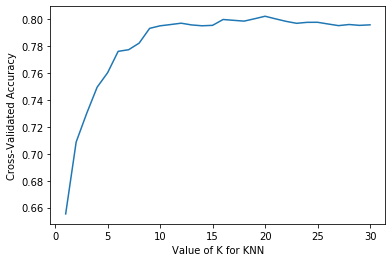

In [278]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

It seems that we could choose K around 20 which will give us best cross validation accuracy.